## 머신러닝
# 교차 검증

### 교차 검증 (Cross Validation)
- 이제 까지 머신러닝을 적용한 결과를 검증하기 위해서, train_test_split() 함수를 사용하여 훈련세트와 테스트 세트를 분리하였다.
- train_test_split() 함수는 랜덤하게 샘플을 선정하므로 실행할 때마다 다른 결과를 얻었었다.
- 교차 검증 기술은 원본 데이터를 **k 개의 구간(폴드)** 로 나눈 다음, 차례 대로 한개의 구간을 테스트 세트로 놓고 k 번의 결과를 도출하는 것이다.
- 교차 검증을 사용하면 러신러닝 모델이 훈련 데이터에 얼마나 민감한지를 알 수 있고, 모든 데이터를 효율적으로 사용할 수 있다. 하지만 작업을 k 번 만큼 하므로 작업시간이 길어진다.
- 두 가지 중요한 옵션
    1. 구간을 나누기 전에 데이터를 섞을 것인가 (shuffle)
    2. 데이터를 나눌 때 목표값 비율 대로 샘플을 넣어 줄 것인가 (stratified)

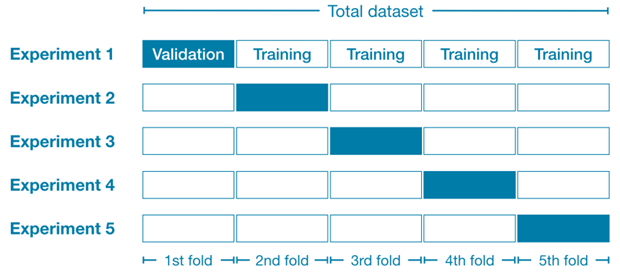

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_features=2)
scores = cross_val_score(model, iris.data, iris.target, cv=5) # cv=3 default

display(scores, scores.mean())

array([0.96666667, 0.96666667, 0.9       , 0.86666667, 1.        ])

0.9400000000000001

- cross_val_score() 함수는 shuffle 을 적용하지 않고, 분류의 경우 원본 비율을 유지(stratified) 한다.
- 이러한 정책을 바꾸려면 cv 옵션에 별도의 클래스를 정의해 주어야 한다. (KFold, StratifiedKFold)

In [4]:
from sklearn.model_selection import KFold

kfold = KFold(3) # shuffle=False
scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)

scores1

array([0., 0., 0.])

In [7]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [11]:
from sklearn.model_selection import KFold

kfold = KFold(10, shuffle=True)
scores1 = cross_val_score(LogisticRegression(max_iter=200), iris.data, iris.target, cv=kfold)

scores1

array([0.93333333, 1.        , 0.93333333, 1.        , 0.86666667,
       0.86666667, 1.        , 1.        , 1.        , 1.        ])

In [15]:
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomState instance used
 |      by `np.random`. Used when

In [8]:
from sklearn.model_selection import KFold

kfold = KFold(3, shuffle=True) # shuffle=True
scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)

scores1

array([0.98, 0.9 , 0.96])

In [27]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(3) # shuffle=False (default)
scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)

scores2

array([0.96078431, 0.92156863, 0.95833333])

In [9]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(3, shuffle=True)
scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)

scores2

array([0.98039216, 0.92156863, 0.97916667])

### LOOCV (Leave One Out Cross Validation)
- 샘플 하나만 테스트 세트로 잡는 방법이다. 원본 데이터 갯수만큼 모델을 적용하므로 연산 비용이 아주 높다.

In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(max_iter=200), iris.data, iris.target, cv=loo)

display(scores, scores.mean())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

0.9666666666666667